In [1]:
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('data/salary.csv')
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
df.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [4]:
df['salary'] = df.fillna(df['salary'].mean())

In [5]:
df.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [6]:
df.dtypes

salary         float64
exprior          int64
yearsworked      int64
yearsrank        int64
market         float64
degree           int64
otherqual        int64
position         int64
male             int64
Field            int64
yearsabs         int64
dtype: object

In [7]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12672.762650,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50165.500000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60306.250000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [8]:
df.Field.unique()

array([3, 2, 4, 1])

In [9]:
df['Field'].replace([1, 2, 3, 4],['Engineering', 'Finance', 'Human_Resources', 'Marketing'],inplace=True)
df['position'].replace([1, 2, 3], ['junior_employee', 'manager', 'executive'], inplace=True)
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,junior_employee,1,Human_Resources,0
1,58000.0,1,0,0,1.24,1,0,junior_employee,1,Finance,0
2,45500.0,0,0,0,1.21,1,0,junior_employee,1,Human_Resources,2
3,35782.0,0,2,1,0.99,1,0,junior_employee,1,Marketing,1
4,34731.0,0,2,2,0.91,1,0,junior_employee,1,Marketing,1


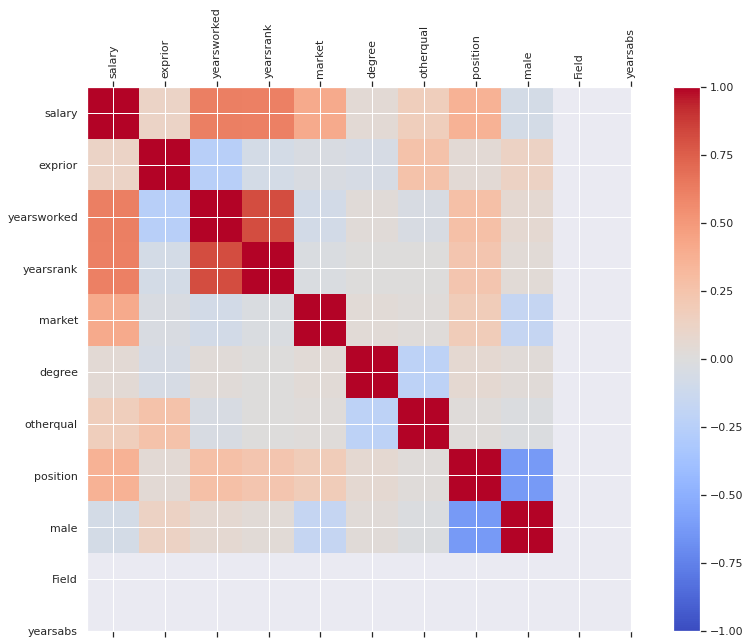

In [10]:
sns.set()
corr = df.corr()
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show();

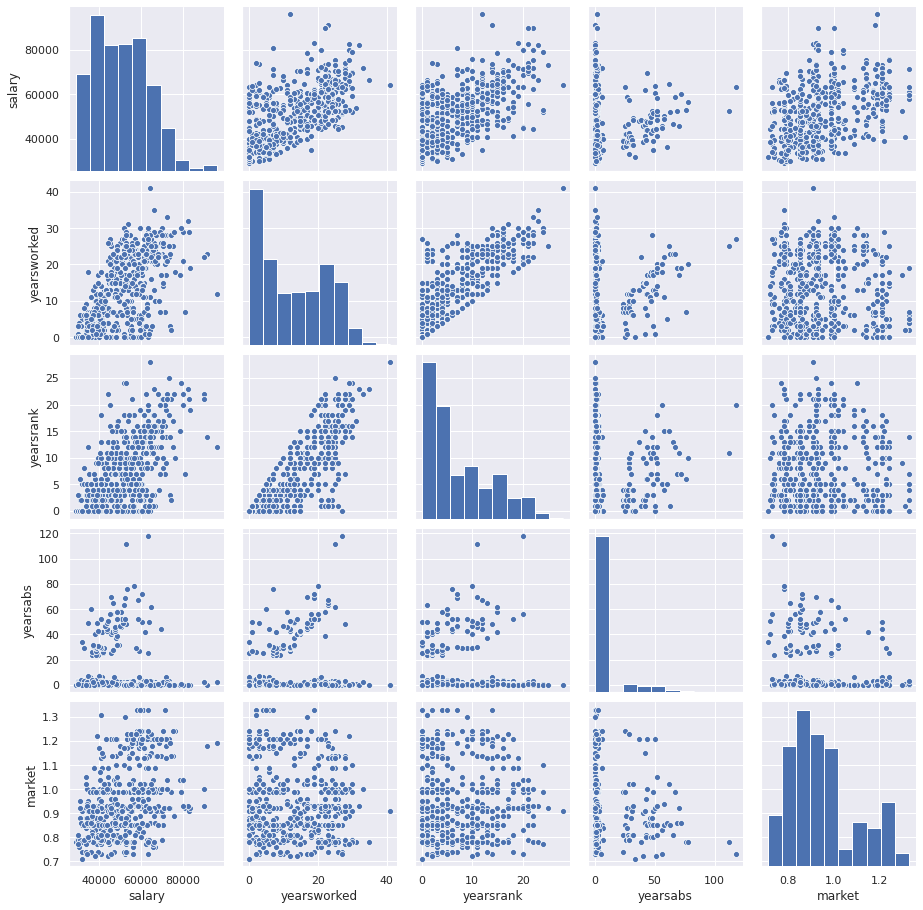

In [11]:
sns.set()
sns.pairplot(df[['salary', 'yearsworked',  'yearsrank', 'yearsabs', 'market']]);

In [12]:
train, test = train_test_split(df, test_size=0.3, random_state=21)
print(f'This is the shape for the train split {train.shape}')
print(f'This is the shape for the test split {test.shape}')

This is the shape for the train split (359, 11)
This is the shape for the test split (155, 11)


In [13]:
train_1 = pd.DataFrame(train, columns=['salary', 'yearsrank', 'market', 'yearsworked'])
salary = train_1.salary
yearsrank = train_1.yearsrank
market = train_1.market
yearsworked = train_1.yearsworked

In [14]:
df_dummies =pd.get_dummies(df.Field).loc[:,['Engineering','Finance','Marketing']]
df_dummies

,Engineering,Finance,Marketing
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
509,0,1,0
510,1,0,0
511,0,0,1
512,0,1,0


In [15]:
results = smf.ols('yearsworked ~ market + yearsrank', data=train_1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            yearsworked   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     345.1
Date:                Mon, 04 May 2020   Prob (F-statistic):           4.72e-84
Time:                        18:32:59   Log-Likelihood:                -1123.9
No. Observations:                 359   AIC:                             2254.
Df Residuals:                     356   BIC:                             2265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7323      1.941      3.468      0.0

In [16]:
results.parms

Intercept    6.732344
market      -2.337022
yearsrank    1.204619
dtype: float64

In [17]:
resids= results.resid
fitted= results.fittedvalues

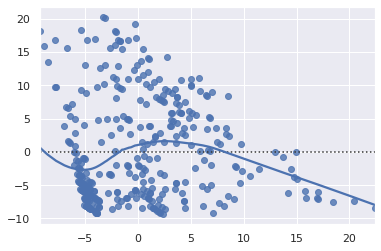

In [21]:
sns.residplot(resids, fitted, lowess=True)
plt.show()